In [ ]:
import re 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dropout,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords

In [31]:
train = pd.read_csv("C:/zshahpouri/data/sms/SMS_train.csv",encoding='latin-1')
test = pd.read_csv("C:/zshahpouri/data/sms/SMS_train.csv",encoding='latin-1')

#### Encoding Label

In [32]:
train['Label'] =  train['Label'].map({"Non-Spam":0,"Spam":1})
test['Label'] =  test['Label'].map({"Non-Spam":0,"Spam":1})

In [33]:
train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,0
1,2,The guy did some bitching but I acted like i'd...,0
2,3,"Pity, * was in mood for that. So...any other s...",0
3,4,Will ü b going to esplanade fr home?,0
4,5,This is the 2nd time we have tried 2 contact u...,1


#### Checking missing values

In [34]:
train.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [35]:
train['Label'].value_counts()

Label
0    835
1    122
Name: count, dtype: int64

#### cleaning

In [36]:
STOPWORDS = stopwords.words("english")

In [37]:
def clean(text):
    text = text.lower()
    text = re.sub("(http|https|www)(:|\.)\S+.com"," ",text)
    text = re.sub("[^\w\d]"," ",text)
    text = " ".join([t for t in text.split() if t not in STOPWORDS])
    return text 

In [38]:
clean("Hello #$$% User !  at Https://gmal.com www.hello.com")

'hello user'

In [39]:
train['cleaned']=  train['Message_body'].apply(lambda x : clean(x))

In [40]:
train.head()

,S. No.,Message_body,Label,cleaned
0,1,Rofl. Its true to its name,0,rofl true name
1,2,The guy did some bitching but I acted like i'd...,0,guy bitching acted like interested buying some...
2,3,"Pity, * was in mood for that. So...any other s...",0,pity mood suggestions
3,4,Will ü b going to esplanade fr home?,0,ü b going esplanade fr home
4,5,This is the 2nd time we have tried 2 contact u...,1,2nd time tried 2 contact u u 750 pound prize 2...


In [41]:
train['cleaned'][:5]

0                                       rofl true name
1    guy bitching acted like interested buying some...
2                                pity mood suggestions
3                          ü b going esplanade fr home
4    2nd time tried 2 contact u u 750 pound prize 2...
Name: cleaned, dtype: object

In [42]:
### Hyperparamters 
vocab_size = 5000
max_len = 30

In [43]:
token = Tokenizer(num_words=vocab_size)
token.fit_on_texts(train['cleaned'])

x_train = token.texts_to_sequences(train['cleaned'])

In [44]:
x_test = test['Message_body'].apply(lambda x : clean(x))
x_test = token.texts_to_sequences(x_test)

In [45]:
x_test =  pad_sequences(x_test,padding='pre',truncating='pre',maxlen=max_len)

In [46]:
x_train[:5]

[[1179, 187, 164],
 [219, 1180, 702, 12, 515, 397, 138, 220, 92, 41, 398, 72, 8],
 [1181, 1182, 1183],
 [27, 102, 34, 703, 1184, 28],
 [267,
  13,
  325,
  3,
  93,
  1,
  1,
  399,
  704,
  73,
  3,
  51,
  221,
  2,
  1185,
  1186,
  400,
  222,
  516,
  139,
  517,
  268]]

In [47]:
x_train = pad_sequences(x_train,maxlen=max_len,padding='pre',truncating='pre')

In [48]:
x_train

array([[   0,    0,    0, ..., 1179,  187,  164],
       [   0,    0,    0, ...,  398,   72,    8],
       [   0,    0,    0, ..., 1181, 1182, 1183],
       ...,
       [   0,    0,    0, ...,   90, 3058,  332],
       [   0,    0,    0, ...,   13,   27,  185],
       [   0,    0,    0, ...,    0,  675,  671]], dtype=int32)

#### Time to Create  a Neural Network

In [49]:
model = Sequential([
    Embedding(vocab_size,100,input_length=max_len),
    Dropout(0.2),
    LSTM(200),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

c:\zshahpouri\nlp_env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
history =  model.fit(x_train,train['Label'],epochs=5,batch_size=32,validation_data=(x_test,test['Label']))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - acc: 0.8534 - loss: 0.4186 - val_acc: 0.8725 - val_loss: 0.2216
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - acc: 0.9188 - loss: 0.1762 - val_acc: 0.9833 - val_loss: 0.0899
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - acc: 0.9865 - loss: 0.0723 - val_acc: 0.9948 - val_loss: 0.0230
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - acc: 0.9956 - loss: 0.0182 - val_acc: 0.9990 - val_loss: 0.0091
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - acc: 0.9988 - loss: 0.0062 - val_acc: 1.0000 - val_loss: 0.0046


<Axes: title={'center': 'Loss'}>

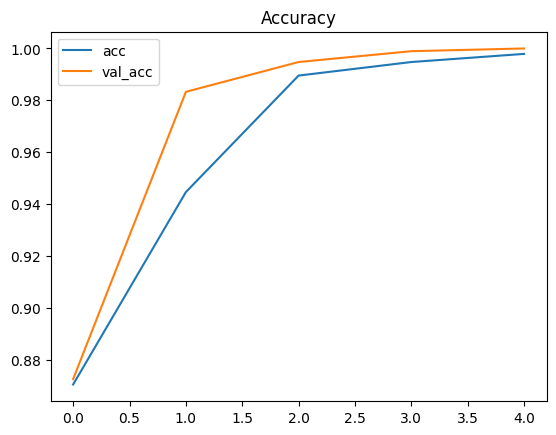

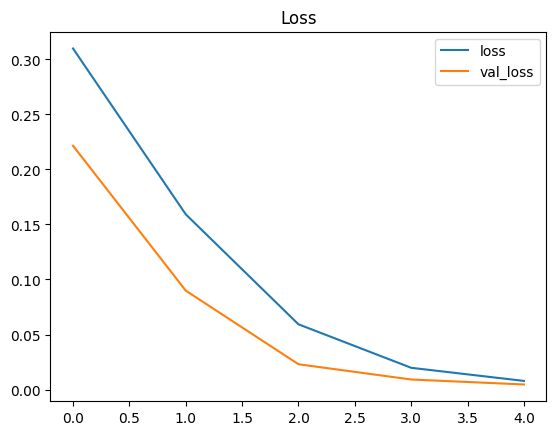

In [53]:
history_df = pd.DataFrame(history.history)
history_df[['acc','val_acc']].plot(title='Accuracy')
history_df[['loss','val_loss']].plot(title='Loss')

In [54]:
loss,acc = model.evaluate(x_test,test['Label'])
acc

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 1.0000 - loss: 0.0041


1.0